In [1]:
import os

In [2]:


class Result():
    def __init__(self, test1,test2,test3,name,fn1,fn2,fn3):
        self.test1 = test1
        self.test2 = test2
        self.test3 = test3
        self.name = name
        self.fn1 = fn1
        self.fn2 = fn2
        self.fn3 = fn3
        self.summary=None
        self.weight=None
        self.mae=None

    def set_summary(self,summary):
        self.summary=summary

    def set_weight(self,weight):
        self.weight=weight



root="./submition/"
names=["Test1_preds.txt","Test2_preds.txt","Test3_preds.txt"]
submition=None

test1=[]
test2=[]
test3=[]
fn1=[]
fn2=[]
fn3=[]


with open(os.path.join(root,names[0])) as f1:
    for line in f1:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016
        l=line.split(",")
        fn1.append(l[0])
        test1.append(float(l[1]))


with open(os.path.join(root,names[1])) as f2:
    for line in f2:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn2.append(l[0])
        test2.append(float(l[1]))

with open(os.path.join(root,names[2])) as f3:
    for line in f3:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn3.append(l[0])
        test3.append(float(l[1]))


result=Result(test1,test2,test3,"submition",fn1,fn2,fn3)
submition = result


print(len(submition.test1))

300


In [3]:

root="./predictions/37orwro0/7327/"
names=["Test1_preds.txt","Test2_preds.txt","Test3_preds.txt"]
eva_prediction=None

test1=[]
test2=[]
test3=[]
fn1=[]
fn2=[]
fn3=[]


with open(os.path.join(root,names[0])) as f1:
    for line in f1:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016
        l=line.split(",")
        fn1.append(l[0])
        test1.append(float(l[1]))


with open(os.path.join(root,names[1])) as f2:
    for line in f2:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn2.append(l[0])
        test2.append(float(l[1]))

with open(os.path.join(root,names[2])) as f3:
    for line in f3:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn3.append(l[0])
        test3.append(float(l[1]))


result=Result(test1,test2,test3,"eva",fn1,fn2,fn3)
eva_prediction = result


print(len(eva_prediction.test1))

300


In [4]:

root="./predictions/y23waiez/32585/"
names=["Test1_preds.txt","Test2_preds.txt","Test3_preds.txt"]
convnext_prediction=None

test1=[]
test2=[]
test3=[]
fn1=[]
fn2=[]
fn3=[]


with open(os.path.join(root,names[0])) as f1:
    for line in f1:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016
        l=line.split(",")
        fn1.append(l[0])
        test1.append(float(l[1]))


with open(os.path.join(root,names[1])) as f2:
    for line in f2:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn2.append(l[0])
        test2.append(float(l[1]))

with open(os.path.join(root,names[2])) as f3:
    for line in f3:
        #C1/3-1-2-submit-00000.mp4,2.9382266998291016

        l=line.split(",")
        fn3.append(l[0])
        test3.append(float(l[1]))


result=Result(test1,test2,test3,"convnext",fn1,fn2,fn3)
convnext_prediction = result


print(len(convnext_prediction.test1))

300


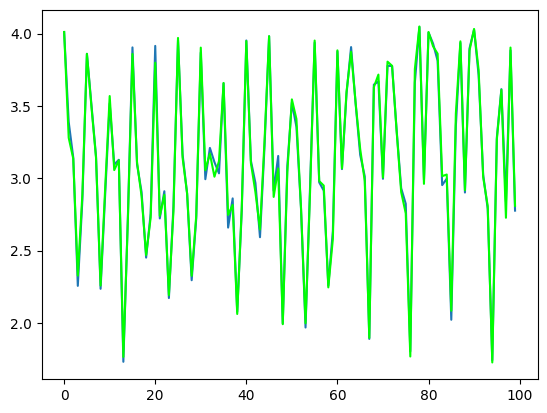

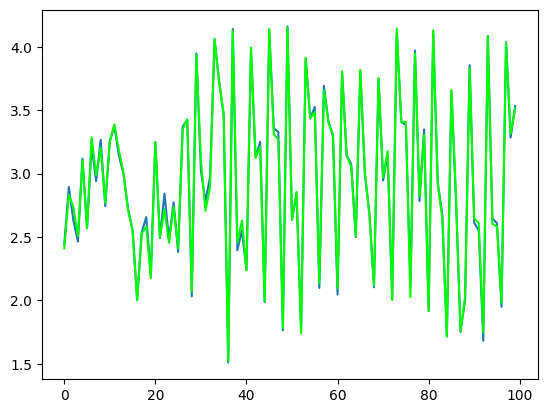

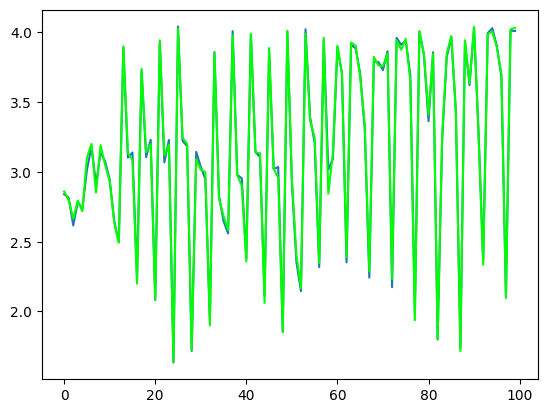

In [5]:
#combine eva_prediction and convnext_prediction

import numpy as np
weight=np.array([0.75,0.25])
#convext vs eva

test1_weighted = np.array(convnext_prediction.test1)*weight[0]+np.array(eva_prediction.test1)*weight[1]
test2_weighted = np.array(convnext_prediction.test2)*weight[0]+np.array(eva_prediction.test2)*weight[1]
test3_weighted = np.array(convnext_prediction.test3)*weight[0]+np.array(eva_prediction.test3)*weight[1]

combined_result=Result(test1_weighted,test2_weighted,test3_weighted,"combined",convnext_prediction.fn1,convnext_prediction.fn2,convnext_prediction.fn3)

#plot
import matplotlib.pyplot as plt
plt.plot(combined_result.test1[:100])
plt.plot(submition.test1[:100],c="lime")
plt.show()

#plot
plt.plot(combined_result.test2[:100])
plt.plot(submition.test2[:100],c="lime")
plt.show()

#plot
plt.plot(combined_result.test3[:100])
plt.plot(submition.test3[:100],c="lime")
plt.show()




In [6]:
#compute difference
#mae
from sklearn.metrics import mean_absolute_error
print("test1 mae:",mean_absolute_error(submition.test1,combined_result.test1))
print("test2 mae:",mean_absolute_error(submition.test2,combined_result.test2))
print("test3 mae:",mean_absolute_error(submition.test3,combined_result.test3))

#coorelation np corrcoef
print("test1 corrcoef:",np.corrcoef(submition.test1,combined_result.test1)[0,1])
print("test2 corrcoef:",np.corrcoef(submition.test2,combined_result.test2)[0,1])
print("test3 corrcoef:",np.corrcoef(submition.test3,combined_result.test3)[0,1])



test1 mae: 0.03007248560587565
test2 mae: 0.025541501492261885
test3 mae: 0.02521169583002726
test1 corrcoef: 0.9976959864175539
test2 corrcoef: 0.9989781149798285
test3 corrcoef: 0.9988755923377973
